In [35]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
train_dataset = torchvision.datasets.MNIST(root = '../../data',
                                           transform = transforms.ToTensor(),
                                           download = True,
                                           train = True,
                                           )
test_dataset = torchvision.datasets.MNIST(root = '../../data',
                                         transform = transforms.ToTensor(),
                                         train = False,
                                         )

In [16]:
img_size = 28*28
num_classes = 10
num_epochs = 10
batch_size = 32
workers = 2
lr = 5e-3

In [53]:
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size = batch_size,
                                               shuffle = True,
                                               num_workers = workers,
                                               )
test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                              batch_size = batch_size,
                                              shuffle = False,
                                              num_workers = workers,
                                              )

In [17]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer1 = nn.Sequential(
            # 1x28x28

            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            # 8x28x28

            nn.MaxPool2d(2, 2)
            # 8x14x14
        )
        self.conv_layer2 = nn.Sequential(
            nn.Conv2d(8, 16, 3, 1, 1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            # 16x14x14

            nn.MaxPool2d(2, 2),
            # 16x7x7
        )
        self.fc = nn.Linear(16*7*7, num_classes)

    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = out.view(out.shape[0], -1) # out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [18]:
model = CNN().to(device)

In [19]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [55]:
total_step = len(train_dataloader)
train_step = 1

for epoch in range(1, num_epochs+1):
    for batch_idx, (images, labels) in enumerate(
        tqdm(train_dataloader, position=0, leave=False, desc='train')
    ):
        images = images.to(device)
        labels = labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if train_step%500 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{train_step}/{total_step*num_epochs}], Loss : {loss.item():.4f}')
        train_step += 1

train:  28%|██▊       | 529/1875 [00:03<00:08, 149.61it/s]

Epoch [1/10], Step [500/18750], Loss : 0.1095


train:  54%|█████▍    | 1017/1875 [00:07<00:05, 156.20it/s]

Epoch [1/10], Step [1000/18750], Loss : 0.0804


train:  81%|████████▏ | 1525/1875 [00:10<00:02, 143.32it/s]

Epoch [1/10], Step [1500/18750], Loss : 0.0038


train:   8%|▊         | 146/1875 [00:01<00:13, 132.79it/s]

Epoch [2/10], Step [2000/18750], Loss : 0.0126


train:  35%|███▍      | 655/1875 [00:04<00:07, 153.36it/s]

Epoch [2/10], Step [2500/18750], Loss : 0.0239


train:  61%|██████    | 1147/1875 [00:08<00:04, 161.75it/s]

Epoch [2/10], Step [3000/18750], Loss : 0.0234


train:  88%|████████▊ | 1653/1875 [00:11<00:01, 166.18it/s]

Epoch [2/10], Step [3500/18750], Loss : 0.1403


train:  14%|█▍        | 271/1875 [00:01<00:10, 158.30it/s]

Epoch [3/10], Step [4000/18750], Loss : 0.0012


train:  41%|████      | 772/1875 [00:05<00:07, 153.01it/s]

Epoch [3/10], Step [4500/18750], Loss : 0.0051


train:  68%|██████▊   | 1280/1875 [00:09<00:04, 125.18it/s]

Epoch [3/10], Step [5000/18750], Loss : 0.0400


train:  94%|█████████▍| 1765/1875 [00:12<00:00, 145.58it/s]

Epoch [3/10], Step [5500/18750], Loss : 0.0241


train:  21%|██        | 396/1875 [00:02<00:09, 149.11it/s]

Epoch [4/10], Step [6000/18750], Loss : 0.0018


train:  47%|████▋     | 890/1875 [00:06<00:07, 123.19it/s]

Epoch [4/10], Step [6500/18750], Loss : 0.0028


train:  74%|███████▍  | 1385/1875 [00:10<00:05, 92.44it/s]

Epoch [4/10], Step [7000/18750], Loss : 0.0118


Epoch [4/10], Step [7500/18750], Loss : 0.0021


train:  28%|██▊       | 520/1875 [00:03<00:08, 162.56it/s]

Epoch [5/10], Step [8000/18750], Loss : 0.0005


train:  55%|█████▍    | 1022/1875 [00:07<00:05, 154.02it/s]

Epoch [5/10], Step [8500/18750], Loss : 0.0075


train:  81%|████████  | 1523/1875 [00:10<00:02, 153.47it/s]

Epoch [5/10], Step [9000/18750], Loss : 0.0266


train:   8%|▊         | 150/1875 [00:01<00:11, 153.68it/s]

Epoch [6/10], Step [9500/18750], Loss : 0.0192


train:  35%|███▍      | 650/1875 [00:04<00:07, 155.45it/s]

Epoch [6/10], Step [10000/18750], Loss : 0.0001


train:  61%|██████    | 1141/1875 [00:07<00:04, 158.75it/s]

Epoch [6/10], Step [10500/18750], Loss : 0.0543


train:  88%|████████▊ | 1641/1875 [00:10<00:01, 145.11it/s]

Epoch [6/10], Step [11000/18750], Loss : 0.0067


train:  13%|█▎        | 253/1875 [00:01<00:11, 135.88it/s]

Epoch [7/10], Step [11500/18750], Loss : 0.0001


train:  41%|████▏     | 778/1875 [00:06<00:07, 145.25it/s]

Epoch [7/10], Step [12000/18750], Loss : 0.0131


train:  68%|██████▊   | 1274/1875 [00:09<00:03, 151.43it/s]

Epoch [7/10], Step [12500/18750], Loss : 0.0001


train:  95%|█████████▍| 1780/1875 [00:12<00:00, 150.30it/s]

Epoch [7/10], Step [13000/18750], Loss : 0.0217


train:  21%|██▏       | 403/1875 [00:03<00:11, 123.19it/s]

Epoch [8/10], Step [13500/18750], Loss : 0.0008


train:  48%|████▊     | 894/1875 [00:06<00:07, 139.43it/s]

Epoch [8/10], Step [14000/18750], Loss : 0.0037


train:  74%|███████▍  | 1395/1875 [00:10<00:03, 148.18it/s]

Epoch [8/10], Step [14500/18750], Loss : 0.0001


Epoch [8/10], Step [15000/18750], Loss : 0.0252


train:  28%|██▊       | 520/1875 [00:04<00:10, 133.95it/s]

Epoch [9/10], Step [15500/18750], Loss : 0.0127


train:  55%|█████▍    | 1029/1875 [00:08<00:05, 152.95it/s]

Epoch [9/10], Step [16000/18750], Loss : 0.0001


train:  81%|████████  | 1517/1875 [00:12<00:03, 114.35it/s]

Epoch [9/10], Step [16500/18750], Loss : 0.0005


train:   8%|▊         | 154/1875 [00:01<00:11, 148.95it/s]

Epoch [10/10], Step [17000/18750], Loss : 0.0002


train:  35%|███▍      | 652/1875 [00:04<00:08, 146.17it/s]

Epoch [10/10], Step [17500/18750], Loss : 0.0009


train:  61%|██████    | 1142/1875 [00:08<00:04, 146.92it/s]

Epoch [10/10], Step [18000/18750], Loss : 0.0064


train:  88%|████████▊ | 1646/1875 [00:12<00:01, 119.22it/s]

Epoch [10/10], Step [18500/18750], Loss : 0.0001


In [65]:
with torch.no_grad():
    for samples, labels in test_dataloader:
        samples = samples.to(device)

        feature_map1 = model.conv_layer1(samples)
        feature_map2 = model.conv_layer2(feature_map1)
        
        feature_map1 = feature_map1.to('cpu')
        feature_map2 = feature_map2.to('cpu')
        break

In [98]:
def matplotlib_imshow(imgs, num_maps=8, title='feature_map', figsize=(12,6)):
    nrows = num_maps // 4

    fig, axes = plt.subplots(nrows, 4, figsize=figsize)
    for i in range(num_maps):
        row = i//4
        col = i%4
        img = imgs[i]
        npimg = img.numpy()
        axes[row][col].imshow(npimg)
        axes[row][col].axis('off')
    plt.suptitle(title)

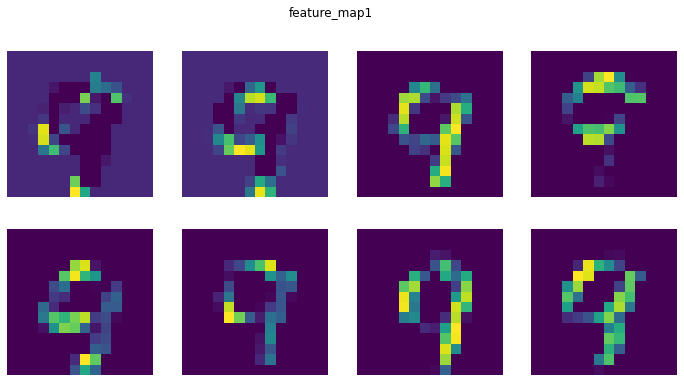

In [106]:
matplotlib_imshow(feature_map1[16], num_maps=8, title='feature_map1')

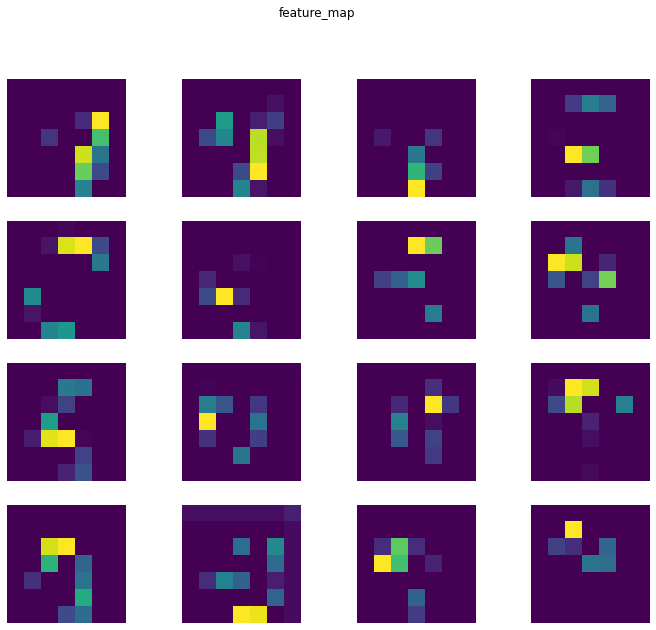

In [107]:
matplotlib_imshow(feature_map2[16], num_maps=16, figsize=(12,10))

In [108]:
labels[16]

tensor(9)